In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pylab
import math
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import nltk
import re

from nltk.tokenize import word_tokenize
from pymystem3 import Mystem  # Лемматизация (опционально)
from natasha import Doc, Segmenter, MorphVocab

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_numeric_dtype

from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from math import sqrt

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

from catboost import CatBoostRegressor
from catboost import Pool, cv

%matplotlib inline

In [2]:
df = pd.read_excel('Выборка_Краснодар_2.xlsx', sheet_name = 0)
df

,ID,All,Мусор,Мусор_1,Мусор_2,Цена,Цена_перв,LN(Цена),Цена(кв.м),Цена(кв.м)_new,...,Инфо,Адрес,Unnamed: 46,Адрес_итог,Адрес_Ya,Долгота,Широта,Сцепка_к,Текст,Ссылка
0,3_avito,0,0,0,0,8399000,NaN,15.943623,128229.007634,133614.625954,...,"3-к. квартира, 65,5 м², 5/5 эт.","ул. Стасова, 132\nр-н Центральный","ул. Стасова, 132\n","Краснодар, ул. Стасова, 132\n","Россия, Краснодар, улица Стасова, 132",39.036192,45.010981,39.036192 45.010981,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,5_avito,0,0,0,0,11000000,NaN,16.213406,119565.217391,124586.956522,...,"3-к. квартира, 92 м², 15/17 эт.","ул. Александра Покрышкина, 4/4\nр-н Прикубанский","ул. Александра Покрышкина, 4/4\n","Краснодар, ул. Александра Покрышкина, 4/4\n","Россия, Краснодар, улица Александра Покрышкина...",38.970992,45.101935,38.970992 45.101935,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
2,6_avito,0,0,0,0,3999999,NaN,15.201805,173913.000000,181217.346000,...,"Квартира-студия, 23 м², 9/16 эт.","ул. Западный Обход, 39/2\nр-н Прикубанский","ул. Западный Обход, 39/2\n","Краснодар, ул. Западный Обход, 39/2\n","Россия, Краснодар, улица Западный Обход, 39/2",38.905658,45.093702,38.905658 45.093702,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
3,9_avito,0,0,0,0,2850000,NaN,14.862830,142500.000000,148485.000000,...,"Квартира-студия, 20 м², 2/3 эт.","1-я Ямальская ул., 5к3\nр-н Прикубанский","1-я Ямальская ул., 5к3\n","Краснодар, 1-я Ямальская ул., 5к3\n","Россия, Краснодар, 1-я Ямальская улица, 5к3",39.029275,45.097119,39.029275 45.097119,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...
4,10_avito,0,0,0,0,3400000,NaN,15.039286,144680.851064,150757.446809,...,"Квартира-студия, 23,5 м², 7/10 эт.","ул. Красных Партизан, 1/3к7\nр-н Прикубанский","ул. Красных Партизан, 1/3к7\n","Краснодар, ул. Красных Партизан, 1/3к7\n","Россия, Краснодар, улица Красных Партизан, 1/3к7",38.897878,45.077226,38.897878 45.077226,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24097,34260_avito,0,0,0,0,6100000,NaN,15.623799,165311.653117,172254.742547,...,NaN,NaN,NaN,"Россия, Краснодар, микрорайон Любимово, 16","Россия, Краснодар, микрорайон Любимово, 16",39.038680,45.079091,39.03868 45.079091,NaN,https://krasnodar.etagi.com/realty/10785272/
24098,34261_avito,0,0,0,0,5998000,NaN,15.606937,149950.000000,156247.900000,...,NaN,NaN,NaN,"Россия, Краснодар, микрорайон Любимово, 18/1","Россия, Краснодар, микрорайон Любимово, 18/1",39.043307,45.078162,39.043307 45.078162,NaN,https://krasnodar.etagi.com/realty/10541705/
24099,34262_avito,0,0,0,0,5500000,NaN,15.520259,150273.224044,156584.699454,...,NaN,NaN,NaN,"Россия, Краснодар, микрорайон Любимово, 16","Россия, Краснодар, микрорайон Любимово, 16",39.038680,45.079091,39.03868 45.079091,NaN,https://krasnodar.etagi.com/realty/10355115/
24100,34259_avito,0,0,0,0,5369000,NaN,15.496152,146693.989071,152855.136612,...,NaN,NaN,NaN,"Россия, Краснодар, микрорайон Любимово, 16","Россия, Краснодар, микрорайон Любимово, 16",39.038680,45.079091,39.03868 45.079091,NaN,https://krasnodar.etagi.com/realty/10328304/


In [3]:
df_1 = df[df['Мусор_1'] == 0]
df_1 = df_1[df_1['dup_res'] == 0]

df_1 = df_1.dropna(subset = ['Текст'])

df_1.reset_index(drop = True, inplace = True)
df_1

,ID,All,Мусор,Мусор_1,Мусор_2,Цена,Цена_перв,LN(Цена),Цена(кв.м),Цена(кв.м)_new,...,Инфо,Адрес,Unnamed: 46,Адрес_итог,Адрес_Ya,Долгота,Широта,Сцепка_к,Текст,Ссылка
0,3_avito,0,0,0,0,8399000,NaN,15.943623,128229.007634,133614.625954,...,"3-к. квартира, 65,5 м², 5/5 эт.","ул. Стасова, 132\nр-н Центральный","ул. Стасова, 132\n","Краснодар, ул. Стасова, 132\n","Россия, Краснодар, улица Стасова, 132",39.036192,45.010981,39.036192 45.010981,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
1,5_avito,0,0,0,0,11000000,NaN,16.213406,119565.217391,124586.956522,...,"3-к. квартира, 92 м², 15/17 эт.","ул. Александра Покрышкина, 4/4\nр-н Прикубанский","ул. Александра Покрышкина, 4/4\n","Краснодар, ул. Александра Покрышкина, 4/4\n","Россия, Краснодар, улица Александра Покрышкина...",38.970992,45.101935,38.970992 45.101935,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...
2,6_avito,0,0,0,0,3999999,NaN,15.201805,173913.000000,181217.346000,...,"Квартира-студия, 23 м², 9/16 эт.","ул. Западный Обход, 39/2\nр-н Прикубанский","ул. Западный Обход, 39/2\n","Краснодар, ул. Западный Обход, 39/2\n","Россия, Краснодар, улица Западный Обход, 39/2",38.905658,45.093702,38.905658 45.093702,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
3,9_avito,0,0,0,0,2850000,NaN,14.862830,142500.000000,148485.000000,...,"Квартира-студия, 20 м², 2/3 эт.","1-я Ямальская ул., 5к3\nр-н Прикубанский","1-я Ямальская ул., 5к3\n","Краснодар, 1-я Ямальская ул., 5к3\n","Россия, Краснодар, 1-я Ямальская улица, 5к3",39.029275,45.097119,39.029275 45.097119,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...
4,10_avito,0,0,0,0,3400000,NaN,15.039286,144680.851064,150757.446809,...,"Квартира-студия, 23,5 м², 7/10 эт.","ул. Красных Партизан, 1/3к7\nр-н Прикубанский","ул. Красных Партизан, 1/3к7\n","Краснодар, ул. Красных Партизан, 1/3к7\n","Россия, Краснодар, улица Красных Партизан, 1/3к7",38.897878,45.077226,38.897878 45.077226,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21392,34256_avito,0,0,0,0,8105025,NaN,15.907995,132435.049020,137997.321078,...,"2-к. квартира, 61,2 м², 19/24 эт.","п. Знаменский, ул. Природная/Светлая/Свободы, ...","п. Знаменский, ул. Природная/Светлая/Свободы, ...","Краснодар, п. Знаменский, ул. Природная/Светла...","Россия, муниципальное образование Краснодар, п...",39.141151,45.060249,39.141151 45.060249,"Родные просторы» — это проект, не имеющий анал...",https://www.avito.ru/krasnodar/kvartiry/2-k._k...
21393,34257_avito,0,0,0,0,8304160,NaN,15.932267,140510.321489,146411.754992,...,"2-к. квартира, 59,1 м², 2/24 эт.","ул. им. Героя Георгия Бочарникова, д. 4\nр-н П...","ул. им. Героя Георгия Бочарникова, д. 4\n","Краснодар, ул. им. Героя Георгия Бочарникова, ...","Россия, Краснодар, улица имени Героя Георгия Б...",39.040845,45.072885,39.040845 45.072885,Жилой комплекс «Абрикосово» на северо-востоке ...,https://www.avito.ru/krasnodar/kvartiry/2-k._k...
21394,34258_avito,0,0,0,0,8226240,NaN,15.922840,122963.228700,128127.684305,...,"2-к. квартира, 66,9 м², 3/3 эт.","ул. Атлантическая, д. 2, корп. 8\nр-н Прикубан...","ул. Атлантическая, д. 2, корп. 8\n","Краснодар, ул. Атлантическая, д. 2, корп. 8\n","Россия, Краснодар, Атлантическая улица, 2к8",38.914461,45.124071,38.914461 45.124071,Продам 2к квартиру в доме комфорт класса в мал...,https://www.avito.ru/krasnodar/kvartiry/2-k._k...
21395,34259_avito,0,0,0,0,9158000,NaN,16.030138,162088.495575,168896.212389,...,"2-к. квартира, 56,5 м², 5/21 эт.","ул. Героев-Разведчиков, д. 11/5\nр-н Прикубанский","ул. Героев-Разведчиков, д. 11/5\n","Краснодар, ул. Героев-Разведчиков, д. 11/5\n","Россия, Краснодар, улица Героев-Разведчиков, 11/5",39.036713,45.054060,39.036713 45.05406,Отли

In [4]:
df_1['ГП_1'] = df_1['ГП_1'].astype(int) #обращаю внимание, что год постройки воспринимался как object

In [5]:
df_1.columns

Index(['ID', 'All', 'Мусор', 'Мусор_1', 'Мусор_2', 'Цена', 'Цена_перв',
       'LN(Цена)', 'Цена(кв.м)', 'Цена(кв.м)_new', 'Цена_об', 'Выбросы',
       'Исп_2', 'Исп', 'Комм', 'Комнатность', 'ОПлощадь', 'Этаж_1', 'Этаж_2',
       'Этаж_3', 'Этаж_4', 'Этажность_1', 'Этажность_2', 'Этаж/этажность',
       'ГП_1', 'ГП_2', 'Ремонт', 'Ремонт_2', 'Ремонт_3', 'Исп.1',
       'Раст_центр_1', 'Раст_центр_2', 'Районы_1', 'Районы_2', 'ЖК_БД',
       'Многоуровневость', 'Терраса', 'Пентхаус', 'dup_all', 'dup_1', 'dup_2',
       'dup_3', 'dup_4', 'dup_res', 'Инфо', 'Адрес', 'Unnamed: 46',
       'Адрес_итог', 'Адрес_Ya', 'Долгота', 'Широта', 'Сцепка_к', 'Текст',
       'Ссылка'],
      dtype='object')

In [8]:
stop_words = pd.read_excel('stop_words_nltk.xlsx', sheet_name = 0)
stop_words

,Unnamed: 0,stop_words
0,0,и
1,1,в
2,2,во
3,3,не
4,4,что
...,...,...
153,153,кв.м.
154,154,м.
155,155,кв.
156,156,кв


In [10]:
dop_words = ['кв.м', 'вы', 'кв.м.', 'м.', 'кв.', 'кв', 'м', 'продается', 'квартира', 'студия', 'жк', 'продам']
stop_words = list(stop_words['stop_words']) + dop_words
stop_words

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [59]:
text = df_1['Текст'][0]

In [60]:
# токенизация
segmenter = Segmenter()

doc = Doc(text)
doc.segment(segmenter)

tokens = []
for token in doc.tokens:
    tokens.append(token.text)
    
tokens

['Продам',
 '3-комнатную',
 'квартиру',
 'с',
 'Евроремонтом',
 ',',
 '65,5',
 'кв',
 '.',
 'М',
 '.',
 'В',
 'квартире',
 '3',
 'изолированные',
 'комнаты',
 ',',
 'кухня',
 '10,6',
 'кв',
 '.',
 'М',
 '.',
 'С',
 'выходом',
 'на',
 'лоджию',
 '.',
 'В',
 'квартире',
 'выполнен',
 'качественные',
 'Евроремонт',
 ',',
 'заменена',
 'электропроводка',
 ',',
 'лоджия',
 'утеплена',
 ',',
 'остается',
 'практически',
 'вся',
 'мебель',
 'и',
 'техника',
 '.',
 'Дом',
 '1975',
 'года',
 'постройки',
 ',',
 'кирпичный',
 ',',
 'в',
 '2016',
 'году',
 'сделан',
 'капитальный',
 'ремонт',
 'с',
 'ремонтом',
 'крыши',
 'и',
 'систем',
 'водоснабжения',
 'и',
 'электроснабжения',
 '.',
 'В',
 '300',
 'м',
 'от',
 'дома',
 'находятся',
 '4',
 'детских',
 'сада',
 '—',
 '№',
 '116',
 ',',
 '№',
 '124',
 ',',
 '№',
 '31',
 'и',
 '№',
 '112',
 ',',
 'Лицей',
 '№',
 '4',
 ',',
 'а',
 'так',
 'же',
 '2',
 'школы',
 '—',
 '№',
 '22',
 ',',
 '№',
 '6',
 ',',
 'и',
 'школа',
 'искусств',
 '№',
 '7',
 '.

In [61]:
# Удаление пунктуационных знаков и прочих символов
punctuation_marks = ['«', '»', '№', '!', ',', '(', ')', ':', ';', '-', '—', '?', '.', '..', '...', '€', '₽', '%', '#']

only_words = []

for token in tokens:
    if token not in punctuation_marks:
        only_words.append(token)
        
only_words

['Продам',
 '3-комнатную',
 'квартиру',
 'с',
 'Евроремонтом',
 '65,5',
 'кв',
 'М',
 'В',
 'квартире',
 '3',
 'изолированные',
 'комнаты',
 'кухня',
 '10,6',
 'кв',
 'М',
 'С',
 'выходом',
 'на',
 'лоджию',
 'В',
 'квартире',
 'выполнен',
 'качественные',
 'Евроремонт',
 'заменена',
 'электропроводка',
 'лоджия',
 'утеплена',
 'остается',
 'практически',
 'вся',
 'мебель',
 'и',
 'техника',
 'Дом',
 '1975',
 'года',
 'постройки',
 'кирпичный',
 'в',
 '2016',
 'году',
 'сделан',
 'капитальный',
 'ремонт',
 'с',
 'ремонтом',
 'крыши',
 'и',
 'систем',
 'водоснабжения',
 'и',
 'электроснабжения',
 'В',
 '300',
 'м',
 'от',
 'дома',
 'находятся',
 '4',
 'детских',
 'сада',
 '116',
 '124',
 '31',
 'и',
 '112',
 'Лицей',
 '4',
 'а',
 'так',
 'же',
 '2',
 'школы',
 '22',
 '6',
 'и',
 'школа',
 'искусств',
 '7',
 'До',
 'кубгу',
 '7',
 'минут',
 'Трамвайная',
 'остановка',
 'в',
 '100',
 'м',
 'Звоните',
 'для',
 'дополнительной',
 'информации',
 'и',
 'организации',
 'просмотра']

In [62]:
# Приводим слова к нормальной форме

morph = pymorphy2.MorphAnalyzer()

lemmas = []
for token in only_words:
    lemmas.append(morph.parse(token)[0].normal_form)

lemmas

['продать',
 '3-комнатный',
 'квартира',
 'с',
 'евроремонт',
 '65,5',
 'кв',
 'м',
 'в',
 'квартира',
 '3',
 'изолировать',
 'комната',
 'кухня',
 '10,6',
 'кв',
 'м',
 'с',
 'выход',
 'на',
 'лоджия',
 'в',
 'квартира',
 'выполнить',
 'качественный',
 'евроремонт',
 'заменить',
 'электропроводка',
 'лоджия',
 'утеплить',
 'оставаться',
 'практически',
 'весь',
 'мебель',
 'и',
 'техника',
 'дом',
 '1975',
 'год',
 'постройка',
 'кирпичный',
 'в',
 '2016',
 'год',
 'сделать',
 'капитальный',
 'ремонт',
 'с',
 'ремонт',
 'крыша',
 'и',
 'система',
 'водоснабжение',
 'и',
 'электроснабжение',
 'в',
 '300',
 'м',
 'от',
 'дом',
 'находиться',
 '4',
 'детский',
 'сад',
 '116',
 '124',
 '31',
 'и',
 '112',
 'лицей',
 '4',
 'а',
 'так',
 'же',
 '2',
 'школа',
 '22',
 '6',
 'и',
 'школа',
 'искусство',
 '7',
 'до',
 'кубга',
 '7',
 'минута',
 'трамвайный',
 'остановка',
 'в',
 '100',
 'м',
 'звонить',
 'для',
 'дополнительный',
 'информация',
 'и',
 'организация',
 'просмотр']

In [96]:
# Полная предобработка текста
punctuation_marks = ['«', '»', '№', '!', ',', '(', ')', ':', ';', '-', '—', '?', '.', '..', '...', '€', '₽', '%', '#']
dop_words = ['кв.м', 'вы', 'кв.м.', 'м.', 'кв.', 'кв', 'м', 'продается', 'квартира', 'студия', 'жк', 'продам']
segmenter = Segmenter()
morph = pymorphy2.MorphAnalyzer()
#morph = pymorphy3.MorphAnalyzer()

def preprocess(text, stop_words, punctuation_marks, morph):
    #text = re.sub(r"\d+", "", text, flags = re.UNICODE)
    for lat_lett, kir_lett in {"a": "а", "e": "е", "o": "о", "p": "р", "c": "с", "y": "у", "x": "х"}.items(): # Меняем латинские буквы на русские
        text = text.replace(lat_lett.lower(), kir_lett)
    # Токенизация
    doc = Doc(text.lower())
    doc.segment(segmenter)

    tokens = []
    for token in doc.tokens:
        tokens.append(token.text)
    
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:                  # Удаление пунктуационных знаков и прочих символов
            lemma = morph.parse(token)[0].normal_form       # Приводим слова к нормальной форме
            if lemma not in stop_words:                     # Исключаем stop_words
                preprocessed_text.append(lemma)
    
    return ' '.join(preprocessed_text)

In [85]:
df_1[0:5].apply(lambda row: preprocess(row['Текст'], punctuation_marks, stop_words, morph), axis = 1)

0    3-комнатный квартира евроремонт 65,5 квартира ...
1    собственник продавать посредник идеальный сост...
2    агент беспокоить дешёвый застройщик 1 5 минута...
3    продажа собственник никакой риелтор комиссия р...
4    продаваться уютный светлоград собственник квар...
dtype: object

In [86]:
df_1['Preprocessed_texts'] = df_1.apply(lambda row: preprocess(row['Текст'], punctuation_marks, stop_words, morph), 
                                                    axis = 1)
df_1

,ID,All,Мусор,Мусор_1,Мусор_2,Цена,Цена_перв,LN(Цена),Цена(кв.м),Цена(кв.м)_new,...,Адрес,Unnamed: 46,Адрес_итог,Адрес_Ya,Долгота,Широта,Сцепка_к,Текст,Ссылка,Preprocessed_texts
0,3_avito,0,0,0,0,8399000,NaN,15.943623,128229.007634,133614.625954,...,"ул. Стасова, 132\nр-н Центральный","ул. Стасова, 132\n","Краснодар, ул. Стасова, 132\n","Россия, Краснодар, улица Стасова, 132",39.036192,45.010981,39.036192 45.010981,"Продам 3-комнатную квартиру с Евроремонтом, 65...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...,"3-комнатный квартира евроремонт 65,5 квартира ..."
1,5_avito,0,0,0,0,11000000,NaN,16.213406,119565.217391,124586.956522,...,"ул. Александра Покрышкина, 4/4\nр-н Прикубанский","ул. Александра Покрышкина, 4/4\n","Краснодар, ул. Александра Покрышкина, 4/4\n","Россия, Краснодар, улица Александра Покрышкина...",38.970992,45.101935,38.970992 45.101935,"Собственник! Продаю без посредников, Квартира ...",https://www.avito.ru/krasnodar/kvartiry/3-k._k...,собственник продавать посредник идеальный сост...
2,6_avito,0,0,0,0,3999999,NaN,15.201805,173913.000000,181217.346000,...,"ул. Западный Обход, 39/2\nр-н Прикубанский","ул. Западный Обход, 39/2\n","Краснодар, ул. Западный Обход, 39/2\n","Россия, Краснодар, улица Западный Обход, 39/2",38.905658,45.093702,38.905658 45.093702,Агентам не Беспокоить. Дешевле чем от застройщ...,https://www.avito.ru/krasnodar/kvartiry/kvarti...,агент беспокоить дешёвый застройщик 1 5 минута...
3,9_avito,0,0,0,0,2850000,NaN,14.862830,142500.000000,148485.000000,...,"1-я Ямальская ул., 5к3\nр-н Прикубанский","1-я Ямальская ул., 5к3\n","Краснодар, 1-я Ямальская ул., 5к3\n","Россия, Краснодар, 1-я Ямальская улица, 5к3",39.029275,45.097119,39.029275 45.097119,"Продажа от собственника, никаких риелтор них к...",https://www.avito.ru/krasnodar/kvartiry/kvarti...,продажа собственник никакой риелтор комиссия р...
4,10_avito,0,0,0,0,3400000,NaN,15.039286,144680.851064,150757.446809,...,"ул. Красных Партизан, 1/3к7\nр-н Прикубанский","ул. Красных Партизан, 1/3к7\n","Краснодар, ул. Красных Партизан, 1/3к7\n","Россия, Краснодар, улица Красных Партизан, 1/3к7",38.897878,45.077226,38.897878 45.077226,Продаётся уютная студия в ЖК« Светлоград» от с...,https://www.avito.ru/krasnodar/kvartiry/kvarti...,продаваться уютный светлоград собственник квар...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21392,34256_avito,0,0,0,0,8105025,NaN,15.907995,132435.049020,137997.321078,...,"п. Знаменский, ул. Природная/Светлая/Свободы, ...","п. Знаменский, ул. Природная/Светлая/Свободы, ...","Краснодар, п. Знаменский, ул. Природная/Светла...","Россия, муниципальное образование Краснодар, п...",39.141151,45.060249,39.141151 45.060249,"Родные просторы» — это проект, не имеющий анал...",https://www.avito.ru/krasnodar/kvartiry/2-k._k...,родный простор это проект иметь аналог краснод...
21393,34257_avito,0,0,0,0,8304160,NaN,15.932267,140510.321489,146411.754992,...,"ул. им. Героя Георгия Бочарникова, д. 4\nр-н П...","ул. им. Героя Георгия Бочарникова, д. 4\n","Краснодар, ул. им. Героя Георгия Бочарникова, ...","Россия, Краснодар, улица имени Героя Георгия Б...",39.040845,45.072885,39.040845 45.072885,Жилой комплекс «Абрикосово» на северо-востоке ...,https://www.avito.ru/krasnodar/kvartiry/2-k._k...,жилой комплекс абрикосовый северо-восток красн...
21394,34258_avito,0,0,0,0,8226240,NaN,15.922840,122963.228700,128127.684305,...,"ул. Атлантическая, д. 2, корп. 8\nр-н Прикубан...","ул. Атлантическая, д. 2, корп. 8\n","Краснодар, ул. Атлантическая, д. 2, корп. 8\n","Россия, Краснодар, Атлантическая улица, 2к8",38.914461,45.124071,38.914461 45.124071,Продам 2к квартиру в доме комфорт класса в мал...,https://www.avito.ru/krasnodar/kvartiry/2-k._k...,2 квартира дом комфорт класс малоэтажный кварт...
21395,34259_avito,0,0,0,0,9158000,NaN,16.030138,162088.495575,168896.212389,...,"ул. Героев-Разведчиков, д. 11/5\nр-н Прикубанский","ул. Героев-Разведчиков, д. 11/5\n","Краснодар, ул. Героев-Разведчиков, д. 1

In [101]:
X = df_1[[
            'ОПлощадь',
            #'Этаж_1',
            #'Этаж_2',
            #'Этаж_3',
            #'Этаж_4',
            'Этажность_1',
            #'Этажность_2',
            'ГП_1',
            #'Ремонт_2',
            #'Ремонт_3',
            'Долгота',
            'Широта',
            #'Раст_центр_1',
            #'Раст_центр_2',
            #'Районы_2',
            #'Многоуровневость',
            #'Терраса',
            #'ЖК_БД',
            #'Цена',
            ##'Цена(кв.м)',
            'Цена(кв.м)_new',
            #'LN(Цена)'
            'Текст',
            #'Preprocessed_texts'
      ]]

#X = df_1[['Текст']]

Y = df_1['Мусор_2']

def get_categorical_indicies(X):
    cats = []
    for col in X.columns:
        if is_numeric_dtype(X[col]):
            pass
        else:
            cats.append(col)
    cat_indicies = []
    for col in cats:
        cat_indicies.append(X.columns.get_loc(col))
    return cat_indicies

cat_features = get_categorical_indicies(X)
print(cat_features)

[6]


In [102]:
cat_features = [1]
text_features = [6]

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21397 entries, 0 to 21396
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ОПлощадь        21397 non-null  float64
 1   Этажность_1     21397 non-null  int64  
 2   ГП_1            21397 non-null  int64  
 3   Долгота         21397 non-null  float64
 4   Широта          21397 non-null  float64
 5   Цена(кв.м)_new  21397 non-null  float64
 6   Текст           21397 non-null  object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.1+ MB


In [107]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0, stratify = Y)

# text_processing = [{
#                    #'tokenizer': 'Word',
#                    'ngram_range': (1, 4),    # 
#                    'max_tokens_count': 2000,
#                    'embedding_size': 300,
#                   }]

catc =  CatBoostClassifier(iterations = 5500, #максимальное количество построенных деревьев
                           random_seed = 4, 
                           learning_rate = 0.3, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                           max_depth = 8, #глубина дерева
                           #l2_leaf_reg = 20, #коэффициент при члене регуляризации L2 функции потерь
                           #bagging_temperature=1,
                           #random_strength=1,
                           one_hot_max_size = 1, #не используем one hot encoding, а включаем one_hot_max_size
                           #loss_function = 'Logloss',
                           eval_metric = 'Accuracy',
                           text_features = text_features,
                           #text_processing = text_processing,
                           #od_type = 'Iter', #если модель переобучилась
                           #od_wait = 20
                           use_best_model = True,
                           early_stopping_rounds = 10) 
#если хотим хорошее качество, то уменьшаем learning_rate и увеличиваем iterations.
#если модель слишком рано переобучается, то l2_leaf_reg увеличиваем.

#cat_features = list(range(0, X.shape[1]))
#cat_features = list(df['transmission'])
#print(cat_features) 

catc.fit(X_train, Y_train, 
         #cat_features = cat_features, #массив с индексами категориальных фичей
         #text_features = text_features,
         eval_set = (X_test, Y_test),
         verbose = False, 
         plot = True) #включение графика

pred_train = catc.predict(X_train)
pred_test = catc.predict(X_test)

print("Train score:", accuracy_score(pred_train, Y_train))
print("Test score:", accuracy_score(pred_test, Y_test))

#print(xgbc.feature_importances_)
print("\nClassification Report : ")
print(classification_report(Y_test, pred_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Train score: 0.9365480837961181
Test score: 0.9

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1940
           1       0.92      0.82      0.87      1270

    accuracy                           0.90      3210
   macro avg       0.91      0.89      0.89      3210
weighted avg       0.90      0.90      0.90      3210



In [ ]:
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1940
           1       0.92      0.82      0.87      1270

    accuracy                           0.90      3210
   macro avg       0.91      0.89      0.89      3210
weighted avg       0.90      0.90      0.90      3210

In [11]:
pred_test_prob = catc.predict_proba(X_test)
pred_test_prob

array([[2.03059817e-04, 9.99796940e-01],
       [1.16294049e-01, 8.83705951e-01],
       [8.09765407e-01, 1.90234593e-01],
       ...,
       [5.30909830e-01, 4.69090170e-01],
       [9.50057703e-01, 4.99422969e-02],
       [3.25944237e-01, 6.74055763e-01]])

In [12]:
pred_test

array([1, 1, 0, ..., 0, 0, 1])

In [13]:
np.array(Y_test)

array([1, 0, 0, ..., 0, 0, 1])

In [14]:
prob = pd.DataFrame(pred_test_prob, columns = ['pr_0', 'pr_1'])
prob['Y_test'] = np.array(Y_test)
#prob['Y_test'] = prob['Y_test'].astype(int)
prob = prob.drop('pr_0', axis = 1)
prob

,pr_1,Y_test
0,0.999797,1
1,0.883706,0
2,0.190235,0
3,0.999383,1
4,0.030850,0
...,...,...
3205,0.874128,1
3206,0.088842,0
3207,0.469090,0
3208,0.049942,0


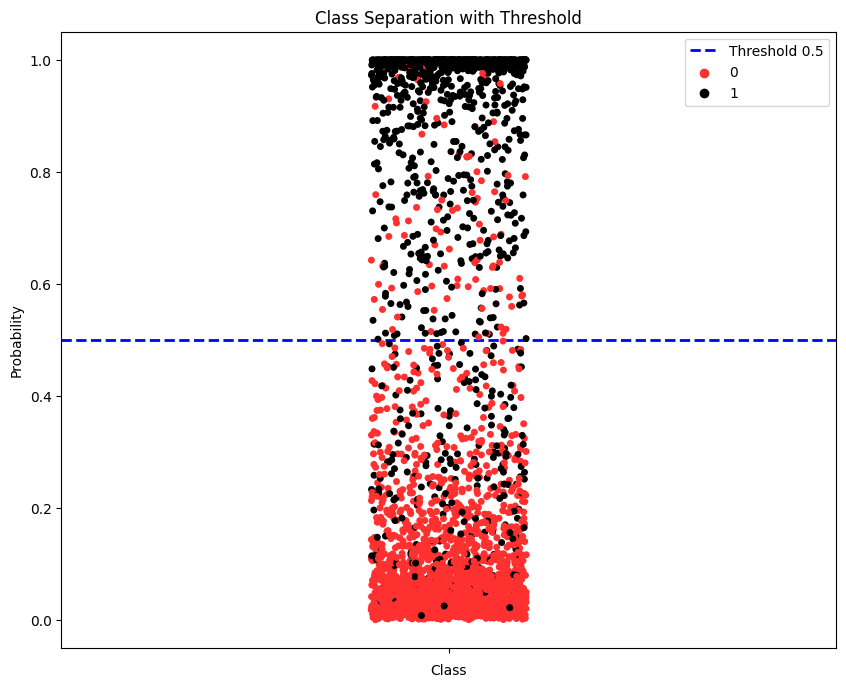

In [15]:
threshold = 0.5

# Строим stripplot с разделением по классам
color = ['#FF3030', '#000000']

plt.figure(figsize = (10, 8))
sns.stripplot(y = 'pr_1', 
              data = prob, 
              jitter = True, 
              hue = 'Y_test', 
              palette = color
             )

# Добавляем линию порога
plt.axhline(y = threshold, 
            color = 'blue', 
            linestyle = '--', 
            linewidth = 2, 
            label = f'Threshold {threshold}'
           )

# Добавляем подписи и легенду
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Class Separation with Threshold')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support

def plot_pr_curve_with_best_threshold(y_true, y_scores):
    """
    Строит Precision-Recall кривую и отмечает точку с максимальным F1-score.
    
    Args:
    y_true: Массив истинных меток (0 или 1).
    y_scores: Массив вероятностей принадлежности к положительному классу.
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    fscores = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscores)
    best_threshold = thresholds[ix]
    best_f1 = fscores[ix]

    plt.figure(figsize = (8, 6))
    
    plt.plot(recall, precision, label = 'Precision-Recall curve')
    plt.scatter(
                recall[ix], 
                precision[ix], 
                marker = 'x', 
                color = 'red', 
                s = 100,
                label = f'Best Threshold: {best_threshold:.2f}, F1-score: {best_f1:.2f}'
               )
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve with Best Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

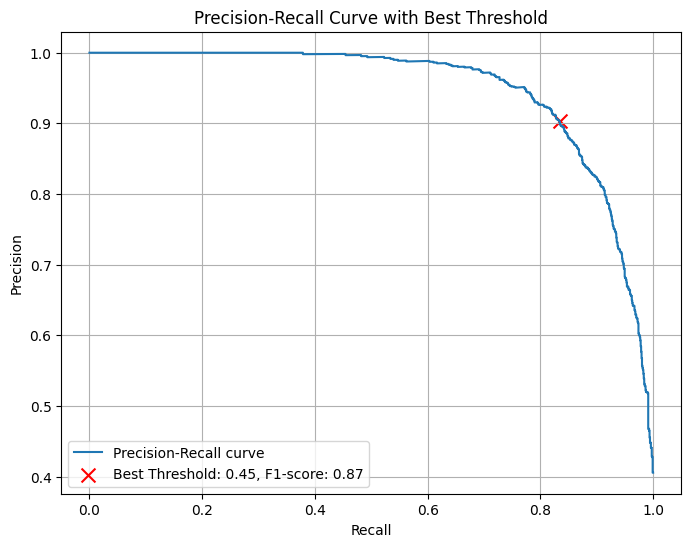

In [17]:
y_true = np.array(Y_test)
y_scores = np.array(prob['pr_1'])

plot_pr_curve_with_best_threshold(y_true, y_scores)

In [18]:
def find_best_threshold_pr(y_true, y_scores):
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    fscores = (2 * precision * recall) / (precision + recall)
    ix = np.argmax(fscores)
    best_threshold = thresholds[ix]
    best_f1 = fscores[ix]
    
    return best_threshold, best_f1

y_true = np.array(Y_test)
y_scores = np.array(prob['pr_1'])
# Пример использования (те же данные, что и выше):
best_threshold, best_f1 = find_best_threshold_pr(y_true, y_scores)

print(f"Лучший порог (по PR-кривой): {best_threshold:.2f}")
print(f"Максимальное значение F1-score: {best_f1:.2f}")

Лучший порог (по PR-кривой): 0.45
Максимальное значение F1-score: 0.87


In [19]:
catc.set_probability_threshold(0.45)  #меняем порог
pred_test = catc.predict(X_test)      #прогнозируем с новым порогом
print(classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1940
           1       0.90      0.83      0.87      1270

    accuracy                           0.90      3210
   macro avg       0.90      0.89      0.89      3210
weighted avg       0.90      0.90      0.90      3210



In [ ]:
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1940
           1       0.92      0.82      0.87      1270

    accuracy                           0.90      3210
   macro avg       0.91      0.89      0.89      3210
weighted avg       0.90      0.90      0.90      321

In [197]:
import pickle

pickle.dump(catc, open('catbmodel_krasnodar_class.pkl', 'wb'))

In [20]:
acc = catc.get_evals_result()
#acc

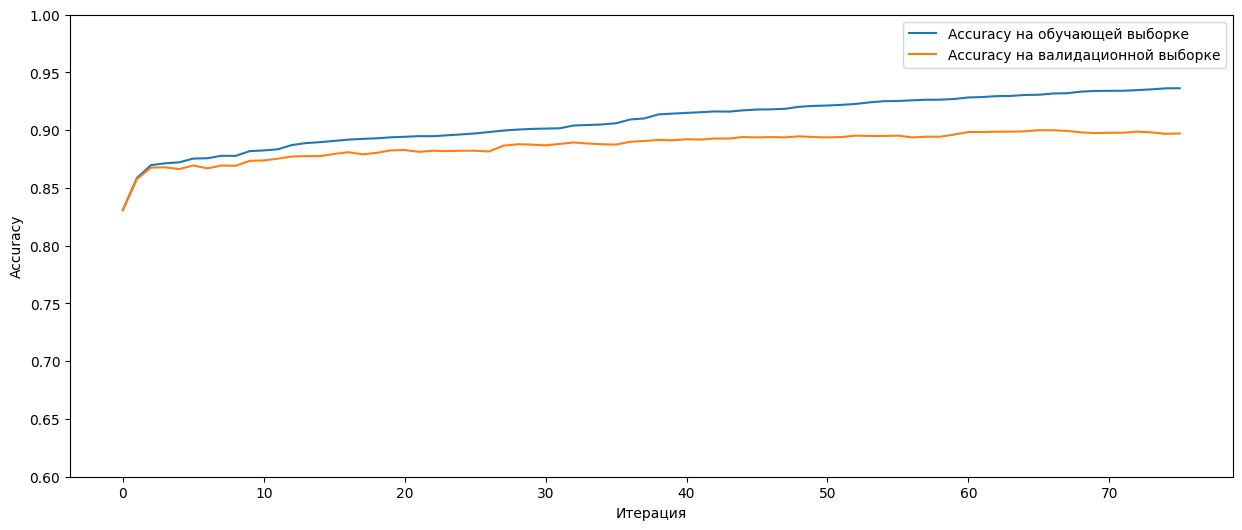

In [21]:
plt.figure(figsize = (15, 6))

plt.plot(acc['learn']['Accuracy'], label = 'Accuracy на обучающей выборке')
plt.plot(acc['validation']['Accuracy'], label = 'Accuracy на валидационной выборке')
plt.xlabel('Итерация')
plt.ylabel('Accuracy')

plt.ylim((0.6, 1))

plt.legend()
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred_test)

array([[1828,  112],
       [ 212, 1058]])

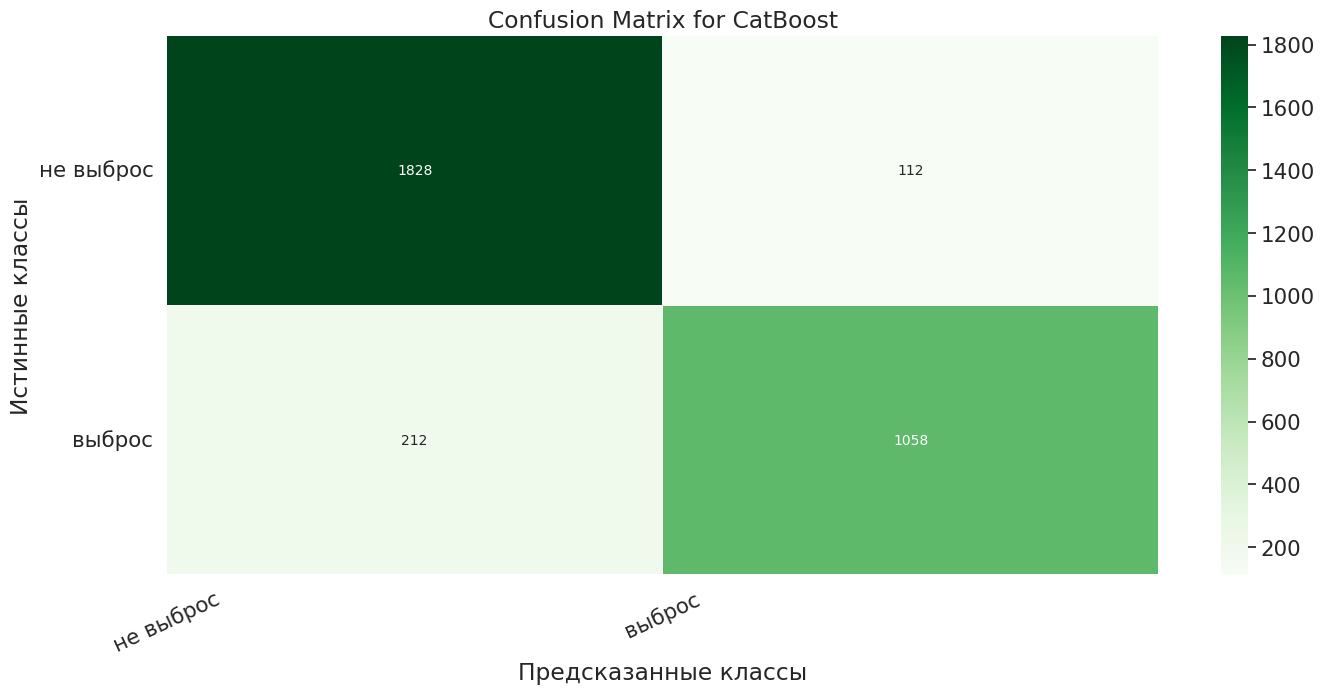

In [23]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, pred_test)
#matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

# Build the plot
plt.figure(figsize = (16, 7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size': 10}, fmt = ".0f",
            cmap = plt.cm.Greens, linewidths = 0.2)

# Add labels to the plot
class_names = ['не выброс', 'выброс']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation = 25)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for CatBoost')
plt.show()

In [24]:
pred_1 = catc.predict(X)
confusion_matrix(Y, pred_1)

array([[12480,   454],
       [  982,  7481]])

In [25]:
print(classification_report(Y, pred_1))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     12934
           1       0.94      0.88      0.91      8463

    accuracy                           0.93     21397
   macro avg       0.93      0.92      0.93     21397
weighted avg       0.93      0.93      0.93     21397



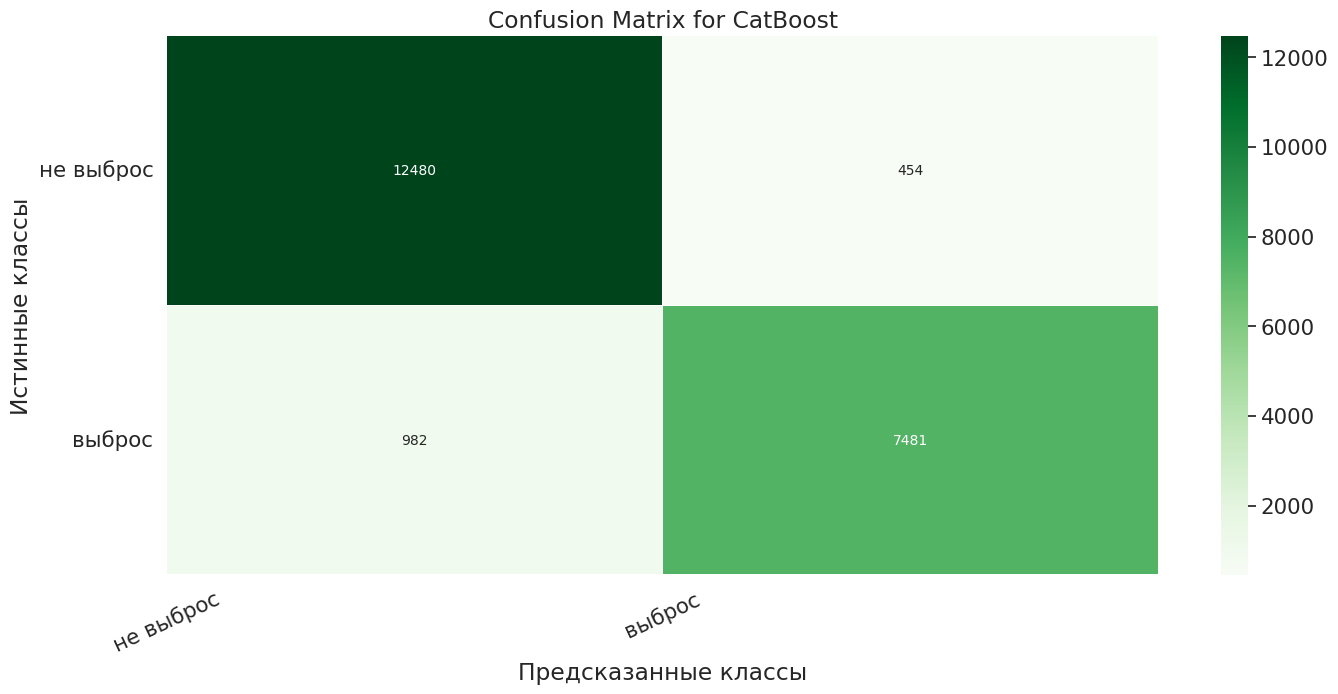

In [26]:
matrix = confusion_matrix(Y, pred_1)
#matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

# Build the plot
plt.figure(figsize = (16, 7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size': 10}, fmt = ".0f",
            cmap = plt.cm.Greens, linewidths = 0.2)

# Add labels to the plot
class_names = ['не выброс', 'выброс']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation = 25)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for CatBoost')
plt.show()

In [27]:
f = catc.get_feature_importance(prettified = True)
f = pd.DataFrame(f)
f

,Feature Id,Importances
0,Цена(кв.м)_new,38.416658
1,Текст,30.892627
2,ОПлощадь,9.503434
3,Долгота,6.362273
4,Этажность_1,5.479745
5,Широта,4.868122
6,ГП_1,4.477140


Text(0.5, 0, 'CatBoost Feature Importance')

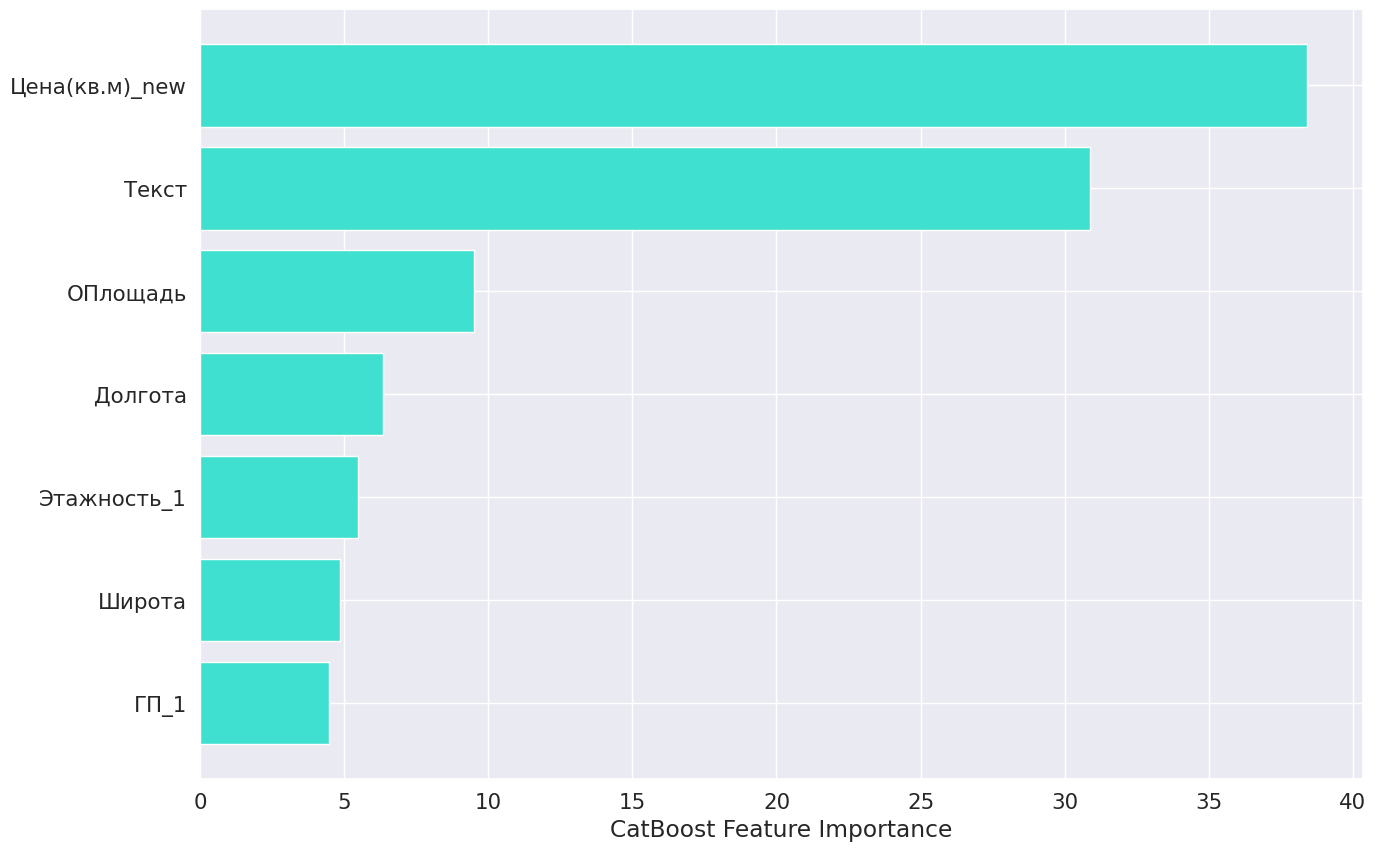

In [28]:
from sklearn.inspection import permutation_importance

feature_names = [
                    'ОПлощадь',
                    #'Этаж_1',
                    #'Этаж_2',
                    #'Этаж_3',
                    #'Этаж_4',
                    'Этажность_1',
                    #'Этажность_2',
                    'ГП_1',
                    #'Ремонт_2',
                    #'Ремонт_3',
                    'Долгота',
                    'Широта',
                    #'Раст_центр_1',
                    #'Раст_центр_2',
                    #'Районы_2',
                    #'Многоуровневость',
                    #'Терраса',
                    #'ЖК_БД',
                    #'Цена',
                    #'Цена(кв.м)',
                    'Цена(кв.м)_new',
                    #'LN(Цена)'
                    'Текст'
                ]
features = np.array(feature_names)

sorted_feature_importance = catc.feature_importances_.argsort()
plt.figure(figsize = (15, 10))
plt.barh(features[sorted_feature_importance], 
         catc.feature_importances_[sorted_feature_importance], 
         color = 'turquoise')
plt.xlabel("CatBoost Feature Importance")

# CV

In [ ]:
#StratifiedShuffleSplit представляет собой комбинацию как ShuffleSplit, так и StratifiedKFold. 
#При использовании StratifiedShuffleSplit пропорция распределения меток классов практически равномерна между обучающим 
#и тестовым набором данных. Основное различие между StratifiedShuffleSplit и StratifiedKFold (shuffle=True) заключается 
#в том, что в StratifiedKFold набор данных перетасовывается только один раз в начале, а затем разбивается на указанное 
#количество сгибов. Это исключает любые шансы на перекрытие наборов обучающих тестов.
#Однако в StratifiedShuffleSplit данные перетасовываются каждый раз перед выполнением разделения, и именно поэтому 
#существует большая вероятность перекрытия между наборами обучающих тестов.

In [207]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import metrics

catc =  CatBoostClassifier(iterations = 5500, #максимальное количество построенных деревьев
                           random_seed = 4, 
                           learning_rate = 0.3, #скорость обучения, определяет насколько быстро или медленно модель будет учиться
                           max_depth = 8, #глубина дерева
                           #l2_leaf_reg=20, #коэффициент при члене регуляризации L2 функции потерь
                           #bagging_temperature=1,
                           #random_strength=1,
                           one_hot_max_size = 1, #не используем one hot encoding, а включаем one_hot_max_size
                           #loss_function = 'Logloss',
                           eval_metric = 'Accuracy',
                           #od_type = 'Iter', #если модель переобучилась
                           #od_wait = 20,
                           use_best_model = True,
                           early_stopping_rounds = 10) #делай остановку через 20 итераций

shuffle_split = StratifiedShuffleSplit(n_splits = 10, test_size = 0.15, random_state = 0)

#массив для сохранения итоговых оценок
all_acc = [] 
all_recall = []
all_precision = []
all_f1 = []
all_auc = []
all_matcorr = []

tr = []
te = []

for n, (tr_index, te_index) in enumerate(shuffle_split.split(X, Y)): #kf.split(X, Y)
    print('Обработка процесса №', n)
    
    tr.append(tr_index)
    te.append(te_index)
    
    # Split data and target
    X_train = X.iloc[tr_index]
    Y_train = Y.iloc[tr_index]
    X_test = X.iloc[te_index]
    Y_test = Y.iloc[te_index]


    catc.fit(X_train, Y_train, 
         text_features = text_features, #массив с индексами текстовых фичей
         eval_set = (X_test, Y_test),
         verbose = False, 
         #plot = True
            ) #включение графика
    
    catc.set_probability_threshold(0.45)  #меняем порог
    pred_test = catc.predict(X_test)      #прогнозируем с новым порогом
    
    #получаем метрики
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred_test, pos_label = 1) #для 1 класса
    all_auc.append(round(metrics.auc(fpr, tpr), 4))
    
    all_acc.append(round(accuracy_score(pred_test, Y_test), 4))
    all_recall.append(round(recall_score(pred_test, Y_test), 4)) #average = 'macro', 'micro', 'weighted'
    all_precision.append(round(precision_score(pred_test, Y_test), 4))
    all_f1.append(round(f1_score(pred_test, Y_test), 4))
    all_matcorr.append(round(metrics.matthews_corrcoef(pred_test, Y_test), 4))

Обработка процесса № 0
Обработка процесса № 1
Обработка процесса № 2
Обработка процесса № 3
Обработка процесса № 4
Обработка процесса № 5
Обработка процесса № 6
Обработка процесса № 7
Обработка процесса № 8
Обработка процесса № 9


In [208]:
# массив оценок по k блокам
print('Acc:', all_acc)
print('Recall:', all_recall)
print('Precision:', all_precision)
print('F1:', all_f1)
print('AUC:', all_auc)
print('Matcorr:', all_matcorr)

Acc: [0.8991, 0.9059, 0.9025, 0.9037, 0.896, 0.8997, 0.8869, 0.8838, 0.8838, 0.8745]
Recall: [0.9043, 0.9201, 0.9072, 0.9256, 0.9091, 0.9165, 0.9017, 0.8952, 0.8924, 0.8902]
Precision: [0.8331, 0.8346, 0.8394, 0.8228, 0.8189, 0.8213, 0.8016, 0.8, 0.8031, 0.7787]
F1: [0.8672, 0.8753, 0.872, 0.8712, 0.8616, 0.8663, 0.8487, 0.8449, 0.8454, 0.8307]
AUC: [0.8877, 0.8936, 0.8916, 0.8898, 0.8826, 0.8861, 0.8722, 0.8693, 0.8699, 0.8579]
Matcorr: [0.7877, 0.8025, 0.795, 0.7983, 0.7814, 0.7894, 0.7623, 0.7555, 0.7554, 0.7358]


In [209]:
# среднее значение
print('Acc_mean:', np.mean(all_acc))
print('Recall_mean:', np.mean(all_recall))
print('Precision_mean:', np.mean(all_precision))
print('F1_mean:', np.mean(all_f1))
print('AUC_mean:', np.mean(all_auc))
print('Matcorr:', np.mean(all_matcorr))

Acc_mean: 0.89359
Recall_mean: 0.9062300000000001
Precision_mean: 0.8153499999999999
F1_mean: 0.8583299999999999
AUC_mean: 0.8800700000000001
Matcorr: 0.77633


# ROC-AUC

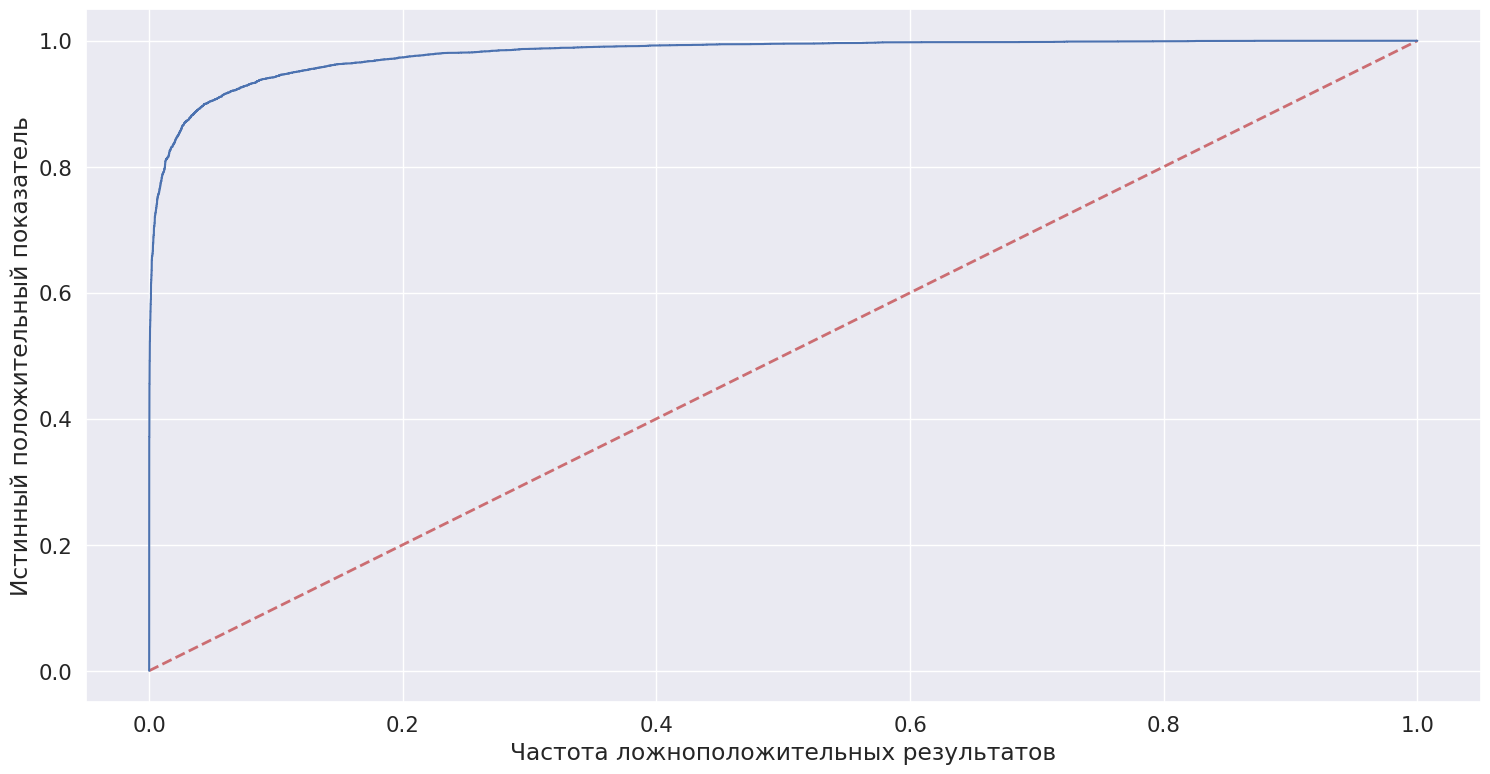

In [29]:
from sklearn import metrics

plt.figure(figsize = (18, 9))

#catc.set_probability_threshold(0.35)            #меняем порог
y_pred = catc.predict_proba(X)[::, 1] 
fpr, tpr, thresholds = metrics.roc_curve(Y, y_pred)

plt.plot([0, 1], [0, 1], linestyle = '--', lw = 2, color = 'r', label = 'Random', alpha = .8)
#plt.axhline(y = 0.9, color = 'r', linestyle = '--', alpha = 0.5)
#plt.axhline(y = 0.97, color = 'r', linestyle = '--', alpha = 0.5)
#plt.axvline(x = 0.05, color = 'r', linestyle = '-', alpha = 0.7)
plt.plot(fpr, tpr) 
plt.ylabel('Истинный положительный показатель') 
plt.xlabel('Частота ложноположительных результатов') 
plt.show()

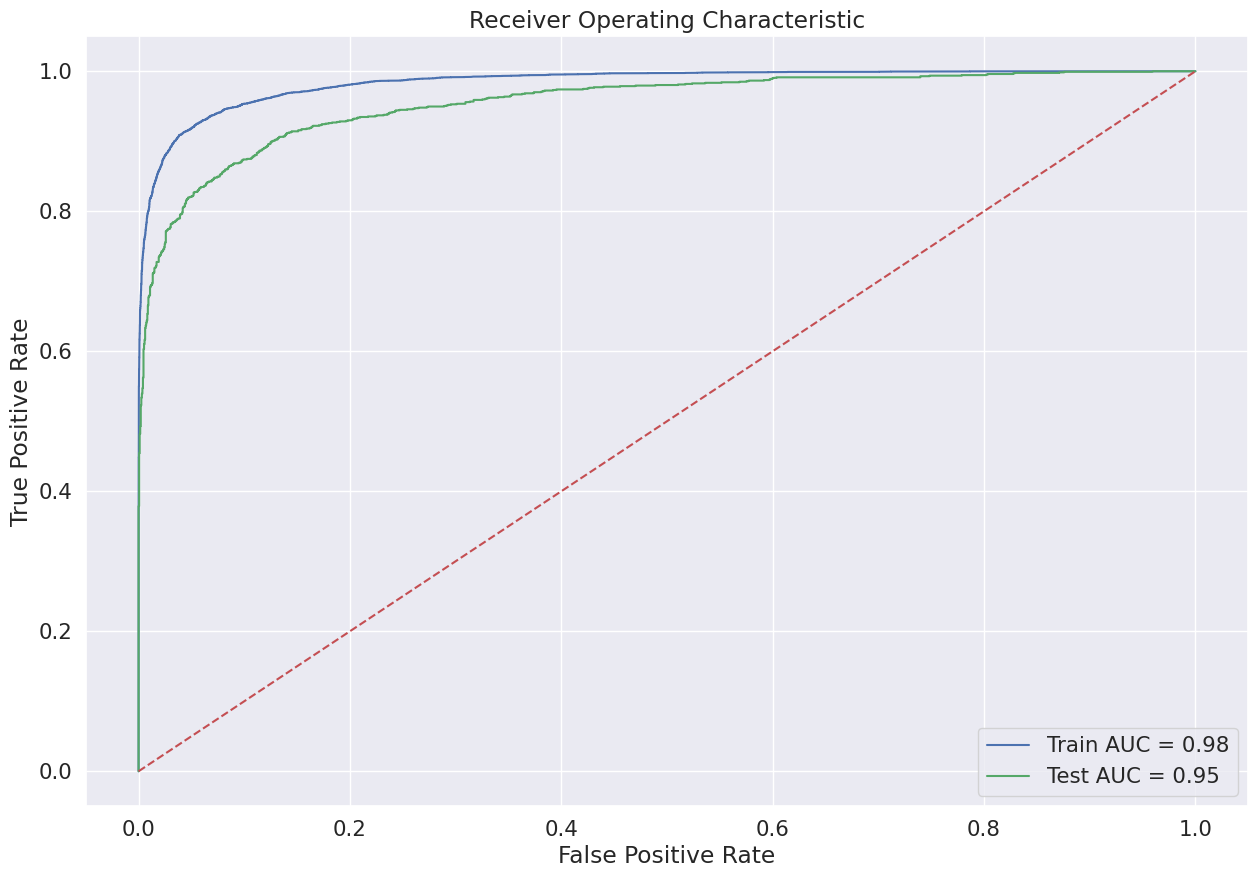

In [30]:
proba_train = catc.predict_proba(X_train)
proba_test = catc.predict_proba(X_test)

train_fpr, train_tpr, train_threshold = metrics.roc_curve(Y_train, proba_train[:, 1])
test_fpr, test_tpr, test_threshold = metrics.roc_curve(Y_test, proba_test[:, 1])

train_roc_auc = metrics.auc(train_fpr, train_tpr)
test_roc_auc = metrics.auc(test_fpr, test_tpr)

fig, ax = plt.subplots(figsize = [15, 10])
plt.title('Receiver Operating Characteristic')
plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc)
plt.plot(test_fpr, test_tpr, 'g', label = 'Test AUC = %0.2f' % test_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Confusion_matrix (поиск смещения в прогнозах)

In [36]:
X_all_test = pd.concat([X_test, Y_test], axis = 1)
X_all_test.reset_index(drop = True, inplace = True)
X_all_test

,ОПлощадь,Этажность_1,ГП_1,Долгота,Широта,Цена(кв.м)_new,Текст,Мусор_2
0,35.1,17,2020,39.002155,45.099346,83122.507123,Продаётся уютная и просторная квартира студия....,1
1,80.0,9,2019,39.003924,45.091965,78150.000000,В продаже уникальная 3-х комнатная квартира дл...,0
2,42.4,17,2014,39.070552,44.992173,105674.528302,Продается уютная 1-комнатная квартира на втори...,0
3,40.9,8,2015,39.011156,45.086563,73882.640587,Продается однокомнатная квартира в развитом ми...,1
4,30.0,7,2012,38.985482,45.133660,118093.333333,Продам квартиру евро двушка с новым ремонтом и...,0
...,...,...,...,...,...,...,...,...
3205,97.8,16,2014,39.034126,45.062171,71917.177914,Продам 3-х комнатную квартиру по ул. Героев Ра...,1
3206,30.1,24,2021,39.030802,45.001524,155656.106312,Жилой комплекс «Фонтаны» от компании «Сск». Де...,0
3207,90.0,16,2017,39.032832,45.068614,103042.222222,Продаю уютную трехкомнатную квартиру в теплом ...,0
3208,65.9,17,2022,39.065944,44.992199,93527.010622,Жилoй кoмплекc «Иван дa Mарья» Литер:1 (Иван)....,0


In [37]:
X_all_test.columns

Index(['ОПлощадь', 'Этажность_1', 'ГП_1', 'Долгота', 'Широта',
       'Цена(кв.м)_new', 'Текст', 'Мусор_2'],
      dtype='object')

In [38]:
# создаем новую переменную rooms_count_new
rooms_count_new = []

for i in tqdm(range(0, len(X_all_test['ОПлощадь']), 1)):
    if X_all_test['ОПлощадь'][i] <= 28:
        rooms_count_new.append('до_28')
    elif X_all_test['ОПлощадь'][i] <= 42:
        rooms_count_new.append('от_29_до_42')
    elif X_all_test['ОПлощадь'][i] <= 65:
        rooms_count_new.append('от_43_до_65')
    elif X_all_test['ОПлощадь'][i] <= 85:
        rooms_count_new.append('от_66_до_85')
    elif X_all_test['ОПлощадь'][i] <= 105:
        rooms_count_new.append('от_86_до_105')
    else:
        rooms_count_new.append('более_105')
        
print(len(rooms_count_new))

100%|██████████| 3210/3210 [00:00<00:00, 39151.91it/s]

3210


In [39]:
X_all_test['ОПлощадь_cat'] = rooms_count_new
X_all_test

,ОПлощадь,Этажность_1,ГП_1,Долгота,Широта,Цена(кв.м)_new,Текст,Мусор_2,ОПлощадь_cat
0,35.1,17,2020,39.002155,45.099346,83122.507123,Продаётся уютная и просторная квартира студия....,1,от_29_до_42
1,80.0,9,2019,39.003924,45.091965,78150.000000,В продаже уникальная 3-х комнатная квартира дл...,0,от_66_до_85
2,42.4,17,2014,39.070552,44.992173,105674.528302,Продается уютная 1-комнатная квартира на втори...,0,от_43_до_65
3,40.9,8,2015,39.011156,45.086563,73882.640587,Продается однокомнатная квартира в развитом ми...,1,от_29_до_42
4,30.0,7,2012,38.985482,45.133660,118093.333333,Продам квартиру евро двушка с новым ремонтом и...,0,от_29_до_42
...,...,...,...,...,...,...,...,...,...
3205,97.8,16,2014,39.034126,45.062171,71917.177914,Продам 3-х комнатную квартиру по ул. Героев Ра...,1,от_86_до_105
3206,30.1,24,2021,39.030802,45.001524,155656.106312,Жилой комплекс «Фонтаны» от компании «Сск». Де...,0,от_29_до_42
3207,90.0,16,2017,39.032832,45.068614,103042.222222,Продаю уютную трехкомнатную квартиру в теплом ...,0,от_86_до_105
3208,65.9,17,2022,39.065944,44.992199,93527.010622,Жилoй кoмплекc «Иван дa Mарья» Литер:1 (Иван)....,0,от_66_до_85


In [40]:
features_CM = ['до_28',
               'от_29_до_42', 
               'от_43_до_65',
               'от_66_до_85',
               'от_86_до_105',
               'более_105'
              ]
features_CM

['до_28',
 'от_29_до_42',
 'от_43_до_65',
 'от_66_до_85',
 'от_86_до_105',
 'более_105']

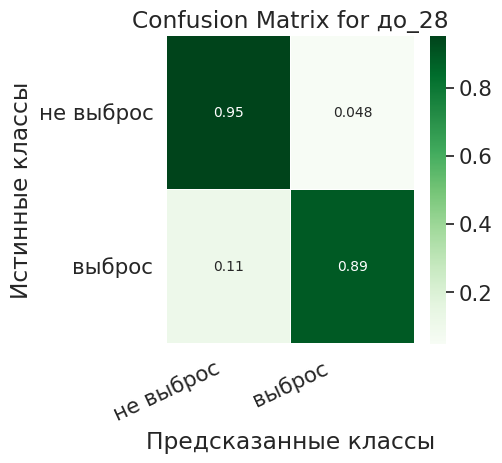

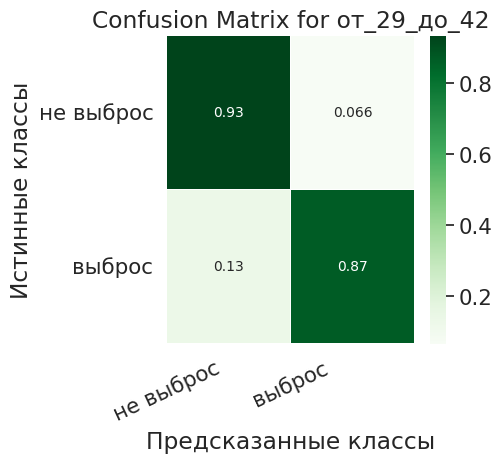

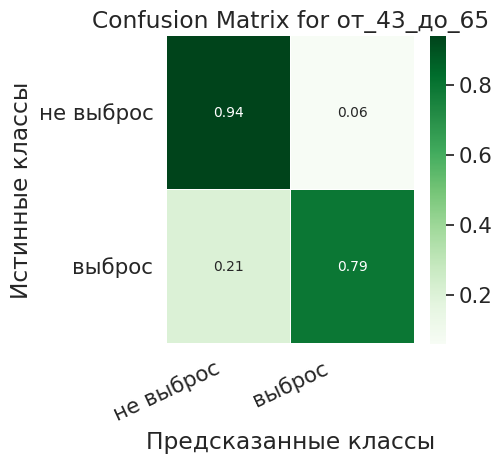

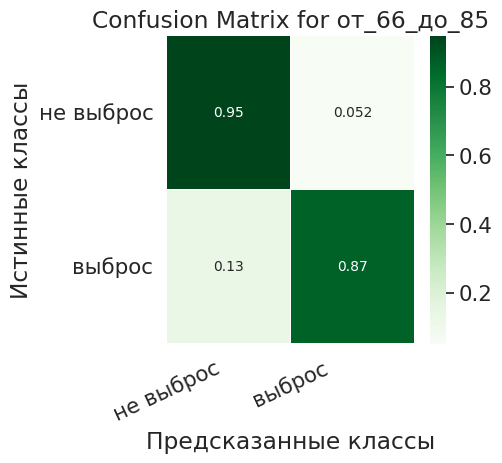

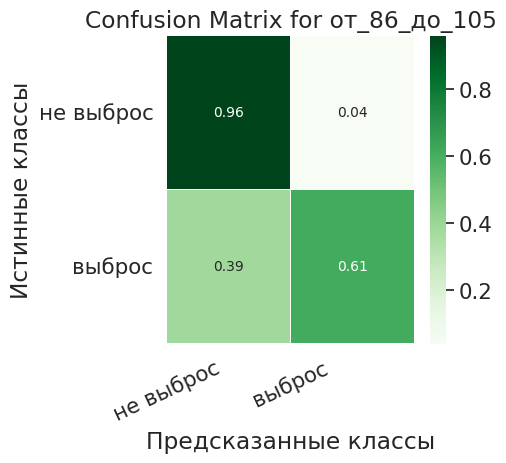

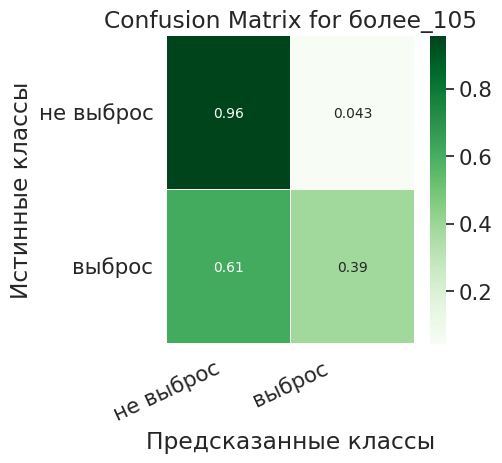

In [42]:
from sklearn.metrics import confusion_matrix

for sq in features_CM:
    Y_test_CM = X_all_test[X_all_test['ОПлощадь_cat'] == sq]['Мусор_2']
    pred_test_CM = catc.predict(X_all_test[X_all_test['ОПлощадь_cat'] == sq][['ОПлощадь', 'Этажность_1', 'ГП_1', 'Долгота', 'Широта', 'Цена(кв.м)_new', 'Текст']])
    
    matrix = confusion_matrix(Y_test_CM, pred_test_CM)
    matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

    # Build the plot
    plt.figure(figsize = (4, 4))
    sns.set(font_scale = 1.4)
    sns.heatmap(matrix, annot = True, annot_kws = {'size': 10},
                cmap = plt.cm.Greens, linewidths = 0.2)

    # Add labels to the plot
    class_names = ['не выброс', 'выброс']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation = 25)
    plt.yticks(tick_marks2, class_names, rotation = 0)
    plt.xlabel('Предсказанные классы')
    plt.ylabel('Истинные классы')
    plt.title(f'Confusion Matrix for {sq}')
    plt.show()

# Примеры

In [ ]:
import catboost
import pandas

df = pandas.DataFrame({
    'a': ['Hello World', 'This is a test', 'foo', 'fooo'],
    'b': ['Hello World', 'This is a test', 'foo', 'fooo'],
    'y': [0,0,1,1]
})

text_processing_options ={
    "tokenizers" : [{
        "tokenizer_id" : "tok",
        "delimiter" : " ",
        "lowercasing" : "true"
    }],

    "dictionaries" : [{
        "dictionary_id" : "word_uni",
        "gram_order" : "1",
        "occurrence_lower_bound":"1"
    }, {
        "dictionary_id" : "char_ngram",
        "gram_order" : "3",
        "token_level_type": 'Letter',
        "occurrence_lower_bound": "1"
    }],

    "feature_processing" : {
        "a" : [{
            "tokenizers_names" : ["tok"],
            "dictionaries_names" : ["word_uni"],
            "feature_calcers" : ["BoW"]
        }],
        "b" : [{
            "tokenizers_names" : ["tok"],
            "dictionaries_names" : ["char_ngram"],
            "feature_calcers" : ["BoW"]
        }],
    }
}
model = catboost.CatBoostClassifier(text_processing=text_processing_options, iterations=10)
model.fit(df[['a','b']], df['y'], text_features=[0, 1])

In [ ]:
model = fit_model(
    train_pool, valid_pool,
    learning_rate=0.35,
    tokenizers=[
        {
            'tokenizer_id': 'Sense',
            'separator_type': 'BySense',
            'lowercasing': 'True',
            'token_types':['Word', 'Number', 'SentenceBreak'],
            'sub_tokens_policy':'SeveralTokens'
        }      
    ],
    dictionaries = [
        {
            'dictionary_id': 'Word',
            'max_dictionary_size': '50000'
        }
    ],
    feature_calcers = [
        'BoW:top_tokens_count=10000'
    ]
)

In [ ]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

# Пример данных
data = {
    'text_feature': ["Просторная квартира с видом на город", 
                     "Квартира в новом ЖК, ремонт под ключ", 
                     "Отличный вариант для семьи, рядом школа"],
    'target': [1, 0, 1]
}
df = pd.DataFrame(data)

# Определяем словари и токенизаторы
tokenizers = [{
    'tokenizer_id': 'Word',
    'separator_type': 'ByDelimiter',
    'delimiter': ' ',
    'lowercased': 'true'
}]

dictionaries = [{
    'dictionary_id': 'Unigram',
    'token_level_type': 'Word',
    'occurrence_lower_bound': 1,  # Учитываем токены с частотой ≥ 1
    'max_dictionary_size': 7  # Максимальный размер словаря
}]

# text_processing = [{
#     'feature_id': 0,  # Индекс текстовой фичи в данных
#     'tokenizer_id': 'Word',
#     'dictionaries_names': ['Unigram'],
#     'gram_order': 3,  # Используем n-граммы до 3-го порядка
#     'skip_step': 0,   # Без пропусков токенов
#     'occurrence_lower_bound': 1
# }]

# Создаем и обучаем модель
model = CatBoostClassifier(
    iterations=50,
    depth=3,
    learning_rate=0.01,
    #text_processing=text_processing,  # Параметры обработки текста
    tokenizers=tokenizers,            # Токенайзеры
    dictionaries=dictionaries         # Словари
)

# Подготовка данных
train_data = Pool(data=df[['text_feature']], label=df['target'], text_features=['text_feature'])

# Обучение модели
model.fit(train_data, verbose=10)

In [ ]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

# Пример данных
data = {
    'text_feature': [
        "Просторная квартира с видом на город", 
        "Квартира в новом ЖК, ремонт под ключ", 
        "Отличный вариант для семьи, рядом школа"
    ],
    'target': [1, 0, 1]
}
df = pd.DataFrame(data)

# Настройки обработки текста
text_processing = {
    'tokenizers': [
        {
            'tokenizer_id': 'Word',
            'separator_type': 'ByDelimiter',
            'delimiter': ' ',
            'lowercased': 'true'
        }
    ],
    'dictionaries': [
        {
            'dictionary_id': 'Unigram',
            'token_level_type': 'Word',
            'occurrence_lower_bound': 2,  # Уменьшаем размер словаря
            'max_dictionary_size': 30  # Ограничиваем до 3000 токенов
        }
    ],
    #'feature_calcers': ['BoW', 'BM25']  # Убираем сложные методы, чтобы сократить нагрузку
}

# Создаем модель
model = CatBoostClassifier(
    iterations=100,  # Снижаем число итераций для теста
    depth=4,         # Уменьшаем глубину для экономии памяти
    learning_rate=0.1,
    text_processing=text_processing
)

# Подготовка данных
train_data = Pool(
    data=df[['text_feature']],  # Текстовый фактор
    label=df['target'],         # Целевая переменная
    text_features=[0]           # Указываем индекс текстового столбца
)

# Обучение модели
model.fit(train_data, verbose=10)

In [ ]:
"text_processing_options" : {
    "tokenizers" : [{
        "tokenizer_id" : "Space",
        "delimiter" : " ",
        "lowercasing" : "true"
    }],

    "dictionaries" : [{
        "dictionary_id" : "BiGram",
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "gram_order" : "1"
    }],

    "feature_processing" : {
        "default" : [{
            "dictionaries_names" : ["Word"],
            "feature_calcers" : ["BoW"],
            "tokenizers_names" : ["Space"]
        }],

        "1" : [{
            "tokenizers_names" : ["Space"],
            "dictionaries_names" : ["BiGram", "Word"],
            "feature_calcers" : ["BoW"]
        }, {
            "tokenizers_names" : ["Space"],
            "dictionaries_names" : ["Word"],
            "feature_calcers" : ["NaiveBayes"]
        }]
    }
}